In [6]:
import numpy as np
from configurations import *
from calculations_file_format_single_event import *

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
return_result_dtype('ALICE')

[('initial_entropy', '<f8', 1),
 ('impact_parameter', '<f8', 1),
 ('npart', '<f8', 1),
 ('ALICE',
  [('nsamples', '<i8', 1),
   ('dNch_deta', '<f8', 1),
   ('dET_deta', '<f8', 1),
   ('Tmunu', '<f8', 10),
   ('Tmunu_chg', '<f8', 10),
   ('dN_dy',
    [('pion', '<f8', 1),
     ('kaon', '<f8', 1),
     ('proton', '<f8', 1),
     ('Lambda', '<f8', 1),
     ('Sigma0', '<f8', 1),
     ('Xi', '<f8', 1),
     ('Omega', '<f8', 1),
     ('phi', '<f8', 1)],
    1),
   ('mean_pT',
    [('pion', '<f8', 1),
     ('kaon', '<f8', 1),
     ('proton', '<f8', 1),
     ('Lambda', '<f8', 1),
     ('Sigma0', '<f8', 1),
     ('Xi', '<f8', 1),
     ('Omega', '<f8', 1),
     ('phi', '<f8', 1)],
    1),
   ('pT_fluct_chg',
    [('N', '<i8', 1), ('sum_pT', '<f8', 1), ('sum_pT2', '<f8', 1)],
    1),
   ('pT_fluct_pid',
    [('pion',
      [('N', '<i8', 1), ('sum_pT', '<f8', 1), ('sum_pT2', '<f8', 1)],
      1),
     ('kaon',
      [('N', '<i8', 1), ('sum_pT', '<f8', 1), ('sum_pT2', '<f8', 1)],
      1),
     ('p

In [8]:
bayes_dtype

[('Pb-Pb-2760',
  [('dNch_deta', [('mean', '<f8', 8), ('err', '<f8', 8)]),
   ('dET_deta', [('mean', '<f8', 22), ('err', '<f8', 22)]),
   ('dN_dy_pion', [('mean', '<f8', 8), ('err', '<f8', 8)]),
   ('dN_dy_kaon', [('mean', '<f8', 8), ('err', '<f8', 8)]),
   ('dN_dy_proton', [('mean', '<f8', 8), ('err', '<f8', 8)]),
   ('dN_dy_Lambda', [('mean', '<f8', 5), ('err', '<f8', 5)]),
   ('dN_dy_Omega', [('mean', '<f8', 4), ('err', '<f8', 4)]),
   ('dN_dy_Xi', [('mean', '<f8', 4), ('err', '<f8', 4)]),
   ('mean_pT_pion', [('mean', '<f8', 8), ('err', '<f8', 8)]),
   ('mean_pT_kaon', [('mean', '<f8', 8), ('err', '<f8', 8)]),
   ('mean_pT_proton', [('mean', '<f8', 8), ('err', '<f8', 8)]),
   ('pT_fluct', [('mean', '<f8', 12), ('err', '<f8', 12)]),
   ('v22', [('mean', '<f8', 8), ('err', '<f8', 8)]),
   ('v32', [('mean', '<f8', 6), ('err', '<f8', 6)]),
   ('v42', [('mean', '<f8', 6), ('err', '<f8', 6)])],
  4)]

In [9]:
#2219658.results.dat

In [10]:
file  = np.fromfile('2116730.results.dat', dtype=return_result_dtype('ALICE'))

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  """Entry point for launching an IPython kernel.


In [11]:
len(file)

4846

<AxesSubplot:ylabel='Count'>

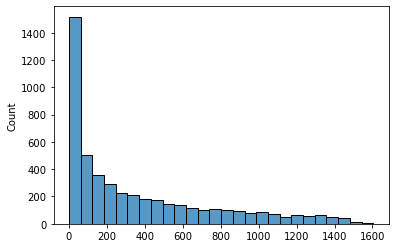

In [51]:
sns.histplot(file['ALICE']['dNch_deta'][:,0])

In [19]:
file_l=0
i = 0
while file_l < len(file):
    i +=1
    file_l = 100*i
    file_new = file[0:file_l]
    with open(f'stat_uncertainty/{i}-fraction.dat','wb') as f:
        f.writelines(file_new)
    print(file_l)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [13]:
#import subprocess
#for tt in range(0,i):
#    print(subprocess.check_output(['python', 'calculations_average_obs_design.py',
#                                   f'/Users/dananjayaliyanage/git/observables/vah_design/stat_uncertainty/{i}_fraction.dat',
#                                  f'/Users/dananjayaliyanage/git/observables/vah_design/stat_uncertainty/{i}_obs.dat']))
    #log=os.system(f'python calculations_average_obs.py /Users/dananjayaliyanage/git/observables/vah_design/stat_uncertainty/{i}_fraction.dat /Users/dananjayaliyanage/git/observables/vah_design/stat_uncertainty/{i}_obs.dat')
#print(log)

In [14]:
dfmn = pd.DataFrame()
dfsd = pd.DataFrame()
for i in range(1,49):
    result_data = np.fromfile(f"/Users/dananjayaliyanage/git/observables/vah_design/stat_uncertainty/{i}-obs.dat", dtype = bayes_dtype)
    df_mean = {}
    df_sd = {}
    for obs, cent_list in obs_cent_list['Pb-Pb-2760'].items():
        for i,cen in enumerate(cent_list):
            mean=result_data["Pb-Pb-2760"][obs]["mean"][0][0][i]
            sd=result_data["Pb-Pb-2760"][obs]["err"][0][0][i]

            obs_name=obs +'_'+ str(cen)
            print(obs_name)
            print(mean)
            print(sd)
            #print(f"for {obs_name} mean is {mean}")
            #print(f"for {obs_name} sd is {sd}")
            if obs_name in df_mean:
                df_mean[obs_name].append(mean)
                df_sd[obs_name].append(sd)
            else:
                df_mean[obs_name] = [mean]
                df_sd[obs_name] = [sd]
    df1 = pd.DataFrame.from_dict(df_mean)
    df2 = pd.DataFrame.from_dict(df_sd)
    if dfmn.empty:
        dfmn = df1
        dfsd = df2
    else:
        dfmn = pd.concat(axis=0, ignore_index=True, objs=[dfmn, df1])
        dfsd = pd.concat(axis=0, ignore_index=True, objs=[dfsd, df2])
#df1 = pd.DataFrame(data=df_mean, index=np.arange(150))
#df2 = pd.DataFrame(data=df_sd, index=np.arange(150))

dNch_deta_[0 5]
1337.1666208791207
58.181991583465766
dNch_deta_[ 5 10]
1049.8134502923979
12.29338388454096
dNch_deta_[10 20]
902.5175465810992
32.929211408211685
dNch_deta_[20 30]
630.2300517914073
15.866107494571441
dNch_deta_[30 40]
449.25931969870373
20.058916131698084
dNch_deta_[40 50]
266.944302857666
21.56718372096149
dNch_deta_[50 60]
137.3174222322674
4.434270683132413
dNch_deta_[60 70]
89.84096490463062
4.882491490593886
dET_deta_[0.  2.5]
1922.438154040751
5.979135763951886
dET_deta_[2.5 5. ]
1627.7962487425596
75.55913955357421
dET_deta_[5.  7.5]
1410.6787903472223
8.352175389342248
dET_deta_[ 7.5 10. ]
1365.4853738596491
32.77277062297146
dET_deta_[10.  12.5]
1325.8593442719298
9.296874100614662
dET_deta_[12.5 15. ]
1261.1406865416668
9.732919263053768
dET_deta_[15.  17.5]
1193.780853117785
30.054780716394095
dET_deta_[17.5 20. ]
982.6030004540598
34.1134321367864
dET_deta_[20.  22.5]
883.4115568876764
3.405195487164268
dET_deta_[22.5 25. ]
840.5709646745605
19.0018997074

0.5056328353782396
0.003908914602715421
mean_pT_pion_[60 70]
0.4778694317536186
0.0035769986523802523
mean_pT_kaon_[0 5]
0.8778478169431747
0.003871670061227126
mean_pT_kaon_[ 5 10]
0.8760943968482264
0.0059176563565122835
mean_pT_kaon_[10 20]
0.875041121041993
0.0034752203415149897
mean_pT_kaon_[20 30]
0.8687775882528136
0.0037784746087943977
mean_pT_kaon_[30 40]
0.8538722532938614
0.004910595679334489
mean_pT_kaon_[40 50]
0.8197216183343858
0.006777630292231694
mean_pT_kaon_[50 60]
0.7675508024149602
0.007109651437516762
mean_pT_kaon_[60 70]
0.7194514012383872
0.0062036778314332516
mean_pT_proton_[0 5]
1.37766143232532
0.008219867603617731
mean_pT_proton_[ 5 10]
1.3749611331822633
0.007836246365306655
mean_pT_proton_[10 20]
1.3685561386241836
0.006236513129518503
mean_pT_proton_[20 30]
1.3489659971737147
0.007174011084414064
mean_pT_proton_[30 40]
1.312018675029241
0.00748097842920754
mean_pT_proton_[40 50]
1.2588838471923718
0.011230991920896057
mean_pT_proton_[50 60]
1.170949776154

84.86476678380528
2.0225597381238183
dN_dy_kaon_[0 5]
222.67171245421247
2.011905830373963
dN_dy_kaon_[ 5 10]
179.5594580814782
1.7824435656452045
dN_dy_kaon_[10 20]
142.8625572656612
1.6767517834056922
dN_dy_kaon_[20 30]
106.75308668854215
1.1506628552004305
dN_dy_kaon_[30 40]
76.91915678299515
1.100719901344665
dN_dy_kaon_[40 50]
49.76055513237493
1.0075067503065138
dN_dy_kaon_[50 60]
29.47748650248333
0.5908525103226618
dN_dy_kaon_[60 70]
15.723450200711808
0.372067577947939
dN_dy_proton_[0 5]
60.57953427524856
0.6026198271749942
dN_dy_proton_[ 5 10]
49.72425487738955
0.5076319373421345
dN_dy_proton_[10 20]
39.511729873754874
0.48377825017076037
dN_dy_proton_[20 30]
30.023660662836157
0.312358737311228
dN_dy_proton_[30 40]
21.706261274534064
0.31605867981486613
dN_dy_proton_[40 50]
14.230354316824249
0.27984620005697763
dN_dy_proton_[50 60]
8.662037296772235
0.16252728078942938
dN_dy_proton_[60 70]
4.794294016214796
0.10708859202491838
dN_dy_Lambda_[0 5]
26.839514652014653
0.2654328

8.203996674817347
dNch_deta_[10 20]
872.4865037861451
8.448880927364478
dNch_deta_[20 30]
625.4436307858196
5.978229672262024
dNch_deta_[30 40]
438.2964715830247
5.2051063529905575
dNch_deta_[40 50]
271.82322281775515
4.590791393856377
dNch_deta_[50 60]
160.13638482733913
3.0182687682000124
dNch_deta_[60 70]
83.22753942152929
1.589665227240377
dET_deta_[0.  2.5]
1867.567026268431
14.221708901908096
dET_deta_[2.5 5. ]
1711.6717765088094
12.12664503703165
dET_deta_[5.  7.5]
1518.1878900622687
10.76605196407148
dET_deta_[ 7.5 10. ]
1383.8861275693957
7.9692310574271445
dET_deta_[10.  12.5]
1299.1042397349374
7.917162089369291
dET_deta_[12.5 15. ]
1182.7078829696404
7.817188608089404
dET_deta_[15.  17.5]
1087.916016607636
7.037710566409391
dET_deta_[17.5 20. ]
1012.0247612934701
7.581123333747052
dET_deta_[20.  22.5]
914.3982642838693
6.099816787095667
dET_deta_[22.5 25. ]
843.3095119795838
5.732998179105567
dET_deta_[25.  27.5]
783.698756064172
3.778722147468622
dET_deta_[27.5 30. ]
708.7

0.0059109093347195565
mean_pT_proton_[50 60]
1.1667230165329936
0.007028560693213003
mean_pT_proton_[60 70]
1.0718217216250765
0.0066184452085284815
pT_fluct_[0 5]
0.011501153796879781
0.0009941004262530924
pT_fluct_[ 5 10]
0.012839118564657078
0.0012859166859472717
pT_fluct_[10 15]
0.01096396651033458
0.001023419979623613
pT_fluct_[15 20]
0.016482681969761426
0.0016523661279880314
pT_fluct_[20 25]
0.01456744404770103
0.0012998590940645257
pT_fluct_[25 30]
0.017950438808988962
0.0015167259487907012
pT_fluct_[30 35]
0.019803852906587146
0.0017295280191064694
pT_fluct_[35 40]
0.020003456068660865
0.0018288669348731769
pT_fluct_[40 45]
0.02583687105065807
0.00258544881138567
pT_fluct_[45 50]
0.028398072858047522
0.0022438926368827947
pT_fluct_[50 55]
0.036769683138564435
0.0028779707161660723
pT_fluct_[55 60]
0.035814374600418614
0.0024298772127665253
v22_[0 5]
0.024390150836749655
0.0015859904316669396
v22_[ 5 10]
0.04240562010694387
0.0021409382359145286
v22_[10 20]
0.06283012361951552


dN_dy_proton_[60 70]
4.361396908750391
0.05919063936583587
dN_dy_Lambda_[0 5]
26.412325396825395
0.20797032859747158
dN_dy_Lambda_[ 5 10]
21.977320548102284
0.17249330077452907
dN_dy_Lambda_[10 20]
17.167360195258595
0.14906016271110292
dN_dy_Lambda_[20 40]
10.423247197538952
0.129035202871385
dN_dy_Lambda_[40 60]
4.333427165331989
0.07307932908428198
dN_dy_Omega_[ 0 10]
0.733512129998198
0.017904257210968923
dN_dy_Omega_[10 20]
0.5148569950263314
0.013632327634650984
dN_dy_Omega_[20 40]
0.31754843694922413
0.006109271177146094
dN_dy_Omega_[40 60]
0.13093915569627707
0.002970986978315672
dN_dy_Xi_[ 0 10]
4.787220698490822
0.06143985078077019
dN_dy_Xi_[10 20]
3.3920570081329813
0.039997779219493476
dN_dy_Xi_[20 40]
2.086302044395106
0.029257741481663612
dN_dy_Xi_[40 60]
0.8687342784948794
0.01609003425470311
mean_pT_pion_[0 5]
0.5544679096889332
0.0010447103808766337
mean_pT_pion_[ 5 10]
0.553949263226153
0.0012852035277640715
mean_pT_pion_[10 20]
0.556256792461826
0.0010151250857552533

14.211007936275193
0.18972698224290585
dN_dy_proton_[0 5]
60.62106125356125
0.4120731654792699
dN_dy_proton_[ 5 10]
50.27111617551505
0.3080405510638051
dN_dy_proton_[10 20]
39.60392269430713
0.31748688106883294
dN_dy_proton_[20 30]
28.255362407297152
0.21225702519249892
dN_dy_proton_[30 40]
19.630848365256853
0.17313975147513733
dN_dy_proton_[40 50]
12.462459610958335
0.12934947270702907
dN_dy_proton_[50 60]
7.6615991709823525
0.08918299732775202
dN_dy_proton_[60 70]
4.3676404221500835
0.05347139265167744
dN_dy_Lambda_[0 5]
26.551807081807087
0.19700328902938388
dN_dy_Lambda_[ 5 10]
22.098774748690897
0.1550257339156448
dN_dy_Lambda_[10 20]
17.202939420821572
0.14026713109751623
dN_dy_Lambda_[20 40]
10.30751998479477
0.11560709715158986
dN_dy_Lambda_[40 60]
4.29803675128395
0.06523637376864153
dN_dy_Omega_[ 0 10]
0.7446676144966908
0.01700175912951803
dN_dy_Omega_[10 20]
0.5136279135306595
0.01213724265642925
dN_dy_Omega_[20 40]
0.3147472119771574
0.005608072573770107
dN_dy_Omega_[40 

dET_deta_[12.5 15. ]
1165.199594409065
6.004613407711287
dET_deta_[15.  17.5]
1072.6478814512855
4.872213924804755
dET_deta_[17.5 20. ]
992.2771505199644
4.587112714812573
dET_deta_[20.  22.5]
894.9251129065623
3.975492739701441
dET_deta_[22.5 25. ]
810.142706925256
3.399550993544031
dET_deta_[25.  27.5]
744.6141635482317
4.071895726521677
dET_deta_[27.5 30. ]
680.0350897217894
3.399471067941797
dET_deta_[30.  32.5]
621.4004943851506
2.665655919645185
dET_deta_[32.5 35. ]
559.7909078041525
4.216829165244255
dET_deta_[35.  37.5]
490.51042368466887
2.659443007384376
dET_deta_[37.5 40. ]
454.2971748436671
2.4196230373979035
dET_deta_[40. 45.]
360.04343940497216
3.112194308687887
dET_deta_[45. 50.]
278.93948148106796
2.2460776897944785
dET_deta_[50. 55.]
213.4964122042204
2.208861360256009
dET_deta_[55. 60.]
156.180390717214
1.7569980562847467
dET_deta_[60. 65.]
110.56321697828643
1.1168460293814642
dET_deta_[65. 70.]
79.62692769733194
0.9586151466640455
dN_dy_pion_[0 5]
1245.4805995988138

dNch_deta_[0 5]
1355.8933943833943
7.458653396096457
dNch_deta_[ 5 10]
1117.8624942667122
5.69209151163431
dNch_deta_[10 20]
855.0651362755408
5.646294387423503
dNch_deta_[20 30]
599.0825605914797
3.958643759326832
dNch_deta_[30 40]
410.1298494329081
3.1569677923608346
dNch_deta_[40 50]
253.2232988542425
2.3400257771640214
dNch_deta_[50 60]
152.07652520157225
1.6385976778001752
dNch_deta_[60 70]
81.06859523870448
1.0079002614117973
dET_deta_[0.  2.5]
1858.6644861336997
10.293805159125274
dET_deta_[2.5 5. ]
1686.273130318651
8.11428551179287
dET_deta_[5.  7.5]
1536.0455012018429
7.280338865866737
dET_deta_[ 7.5 10. ]
1392.843185320737
5.3659452250626
dET_deta_[10.  12.5]
1280.0738279371049
5.863596193254602
dET_deta_[12.5 15. ]
1154.4352413115002
5.704373274669406
dET_deta_[15.  17.5]
1066.3206773636223
4.453290203624476
dET_deta_[17.5 20. ]
979.2961416439125
4.369725169978621
dET_deta_[20.  22.5]
889.4539370490933
4.0044242810303805
dET_deta_[22.5 25. ]
808.5449860666195
3.373141639887

dET_deta_[60. 65.]
108.20341370911297
0.9403964287288669
dET_deta_[65. 70.]
74.8572707907567
0.7762391275306422
dN_dy_pion_[0 5]
1238.887037037037
6.999591474294839
dN_dy_pion_[ 5 10]
1012.348097663367
4.92520914190701
dN_dy_pion_[10 20]
772.5910358325822
4.750459354917862
dN_dy_pion_[20 30]
542.1112758985705
3.472725601106254
dN_dy_pion_[30 40]
369.87283581283776
2.661117786957767
dN_dy_pion_[40 50]
230.6756475062229
1.944434293709979
dN_dy_pion_[50 60]
138.45008723858285
1.4110275523545155
dN_dy_pion_[60 70]
73.99928975828217
0.865364925495478
dN_dy_kaon_[0 5]
218.8017317867318
1.2008115580326537
dN_dy_kaon_[ 5 10]
179.43621813247717
0.8663454207389407
dN_dy_kaon_[10 20]
137.98181617008737
0.8417509000730499
dN_dy_kaon_[20 30]
97.61127383881707
0.6297362392135041
dN_dy_kaon_[30 40]
66.9870671584065
0.4802687791332736
dN_dy_kaon_[40 50]
42.08813300793059
0.3490861772495833
dN_dy_kaon_[50 60]
25.472609309756653
0.25807451561307637
dN_dy_kaon_[60 70]
13.718007127847471
0.157718135009115

dET_deta_[55. 60.]
151.5091707955178
1.4166645378948033
dET_deta_[60. 65.]
106.61523120822756
0.9019343941858687
dET_deta_[65. 70.]
72.9003735146574
0.7484643300337411
dN_dy_pion_[0 5]
1239.9254465811966
6.722913492645268
dN_dy_pion_[ 5 10]
1010.4216759832588
4.65615444619902
dN_dy_pion_[10 20]
765.2845874909534
4.577315208271975
dN_dy_pion_[20 30]
531.945287487373
3.4066149433227415
dN_dy_pion_[30 40]
360.0696131593919
2.386978599495303
dN_dy_pion_[40 50]
227.2073661145499
1.7910752802834706
dN_dy_pion_[50 60]
137.20900683164066
1.3239589760591453
dN_dy_pion_[60 70]
72.74537972280231
0.8293456226366429
dN_dy_kaon_[0 5]
219.09359798534797
1.146317784701632
dN_dy_kaon_[ 5 10]
179.28029970760235
0.8150999524694997
dN_dy_kaon_[10 20]
136.6676840793201
0.8146148411833602
dN_dy_kaon_[20 30]
95.83829965433506
0.6207627782554154
dN_dy_kaon_[30 40]
65.24098698043353
0.42877938472188076
dN_dy_kaon_[40 50]
41.4667822205806
0.31983217468848507
dN_dy_kaon_[50 60]
25.253366756204354
0.2415897577216

0.00043626821635245344
v42_[30 40]
0.014389881824279189
0.0005048896985559851
v42_[40 50]
0.014340143503540985
0.0005407752024571403
dNch_deta_[0 5]
1353.9916785991786
6.884636040544259
dNch_deta_[ 5 10]
1102.3191329705726
4.8253343457914095
dNch_deta_[10 20]
832.1724840185536
4.8497227430953105
dNch_deta_[20 30]
573.3960005219442
3.5932677471492043
dNch_deta_[30 40]
385.97744701893043
2.507933271595636
dNch_deta_[40 50]
242.85083230881102
1.826298460833852
dNch_deta_[50 60]
146.55463936777963
1.3227223460828805
dNch_deta_[60 70]
77.04760978676983
0.8428013417922112
dET_deta_[0.  2.5]
1868.9654964360036
9.056790554419532
dET_deta_[2.5 5. ]
1674.2204421702345
6.747753393170022
dET_deta_[5.  7.5]
1512.3720968568086
6.538850492798226
dET_deta_[ 7.5 10. ]
1375.2936189879167
4.501254346490946
dET_deta_[10.  12.5]
1249.931038042268
5.055425782627304
dET_deta_[12.5 15. ]
1124.351130211451
4.288873856729923
dET_deta_[15.  17.5]
1036.3009923968134
3.7404286611962796
dET_deta_[17.5 20. ]
948.677

0.000570569136439196
pT_fluct_[ 5 10]
0.011620398219422236
0.0007598506459681664
pT_fluct_[10 15]
0.013253800274202546
0.0007853977590581605
pT_fluct_[15 20]
0.01543737775778812
0.0008201578582519515
pT_fluct_[20 25]
0.01562592476930332
0.0008970160705689336
pT_fluct_[25 30]
0.01775659835666258
0.0009143269033619971
pT_fluct_[30 35]
0.019818071920009228
0.0010771913766592564
pT_fluct_[35 40]
0.020706165137927956
0.0010546552470891994
pT_fluct_[40 45]
0.025623510403262845
0.001353762277006097
pT_fluct_[45 50]
0.02918913708174256
0.001531819546563939
pT_fluct_[50 55]
0.0334239269807438
0.001734075165320671
pT_fluct_[55 60]
0.03676762034830242
0.0020924634963492873
v22_[0 5]
0.026040704220771364
0.0011013016817501729
v22_[ 5 10]
0.04350043051342209
0.0012471763311971346
v22_[10 20]
0.06390521009134825
0.0012601287692913935
v22_[20 30]
0.08319361268246624
0.0012892290206203288
v22_[30 40]
0.09395520161889272
0.0015501932151483768
v22_[40 50]
0.09870549784249306
0.0017182371081547322
v22_[5

dN_dy_Lambda_[10 20]
16.5187918732801
0.09853507624911073
dN_dy_Lambda_[20 40]
9.573028927160943
0.07823766358287508
dN_dy_Lambda_[40 60]
4.094528404265276
0.0415073091892999
dN_dy_Omega_[ 0 10]
0.7310459684974921
0.011981074822384264
dN_dy_Omega_[10 20]
0.49897019149927735
0.007868393250436362
dN_dy_Omega_[20 40]
0.29276713283980327
0.0037201609916919457
dN_dy_Omega_[40 60]
0.12625044406640226
0.0017904493047038437
dN_dy_Xi_[ 0 10]
4.78545186333998
0.041642616742412895
dN_dy_Xi_[10 20]
3.2490287451607456
0.02509747209174468
dN_dy_Xi_[20 40]
1.9171417931691308
0.017371188601863468
dN_dy_Xi_[40 60]
0.8242187595812571
0.009061043214577165
mean_pT_pion_[0 5]
0.5547803493761155
0.0007069195042670255
mean_pT_pion_[ 5 10]
0.5540763293896696
0.0007635468094135177
mean_pT_pion_[10 20]
0.5549689617805386
0.000644686708218814
mean_pT_pion_[20 30]
0.550066432104251
0.0007607364500170185
mean_pT_pion_[30 40]
0.540491972882951
0.0008577618894407038
mean_pT_pion_[40 50]
0.524304050283472
0.001066584

dET_deta_[30.  32.5]
577.2110271358312
2.4650486129799765
dET_deta_[32.5 35. ]
511.3068031926899
2.202557921169902
dET_deta_[35.  37.5]
465.13967972598533
1.8468236043153463
dET_deta_[37.5 40. ]
416.9495749176841
2.0502076096171056
dET_deta_[40. 45.]
344.21376416544655
1.9274841517825088
dET_deta_[45. 50.]
264.6152705133382
1.659186658266183
dET_deta_[50. 55.]
202.6726920058463
1.3435790409268786
dET_deta_[55. 60.]
151.4443553095433
1.1661938235965337
dET_deta_[60. 65.]
106.8829939036212
0.7941329133859452
dET_deta_[65. 70.]
74.44616898573899
0.641875633000572
dN_dy_pion_[0 5]
1246.2467665058518
5.5262058546920745
dN_dy_pion_[ 5 10]
1013.5869333064848
4.198250132545635
dN_dy_pion_[10 20]
766.996078295469
4.022498341297333
dN_dy_pion_[20 30]
525.3319630912571
2.8930981174792145
dN_dy_pion_[30 40]
352.78361504557085
2.0572148019945438
dN_dy_pion_[40 50]
224.46840586463642
1.5584411932597262
dN_dy_pion_[50 60]
135.58913653984604
1.055446638457177
dN_dy_pion_[60 70]
73.49127991110494
0.693

v42_[10 20]
0.01231719276712343
0.00036588314756286043
v42_[20 30]
0.012868536343258758
0.0003911406366226609
v42_[30 40]
0.014282014390522745
0.0004370258798692575
v42_[40 50]
0.014232748599105033
0.00045513187083703134
dNch_deta_[0 5]
1360.6346033133534
5.8021679558072945
dNch_deta_[ 5 10]
1106.2597437806862
4.355223149551105
dNch_deta_[10 20]
835.2839606324341
4.276557278517981
dNch_deta_[20 30]
571.7929067074101
2.9679705675881562
dNch_deta_[30 40]
386.23268872596424
2.1982922753338205
dNch_deta_[40 50]
245.5853909115537
1.688092788741378
dNch_deta_[50 60]
148.4639730816671
1.1002823802248742
dNch_deta_[60 70]
79.66429612230544
0.7465484790972189
dET_deta_[0.  2.5]
1873.892338422265
7.640163778423291
dET_deta_[2.5 5. ]
1687.532606117835
5.545126972018849
dET_deta_[5.  7.5]
1519.3730921102635
5.7072129146481005
dET_deta_[ 7.5 10. ]
1377.385138324012
4.02704579069936
dET_deta_[10.  12.5]
1253.1258775337294
4.264472864140441
dET_deta_[12.5 15. ]
1136.7835743441158
3.8201731673620736
d

v22_[ 5 10]
0.04244509471790125
0.001091025095950145
v22_[10 20]
0.06302744512562133
0.0010584772391341833
v22_[20 30]
0.08201581093650996
0.0011239440998283897
v22_[30 40]
0.09171282501300401
0.001326539299816047
v22_[40 50]
0.09768978203863447
0.0014606610619706186
v22_[50 60]
0.09056927971017442
0.001517334893818885
v22_[60 70]
0.0806976048692283
0.0013914805601270258
v32_[0 5]
0.019233046059452034
0.0007639756247831899
v32_[ 5 10]
0.02178118862147022
0.0007237097051726858
v32_[10 20]
0.024249380994907727
0.0006102155738449467
v32_[20 30]
0.0262041761220563
0.0006281688557493824
v32_[30 40]
0.027532955732131385
0.000731518532037046
v32_[40 50]
0.026211267611343392
0.000648562864625984
v42_[0 5]
0.009448745512837226
0.0004414349158383038
v42_[ 5 10]
0.010043444081125452
0.0004160111587341537
v42_[10 20]
0.012336829562098393
0.0003559849575025805
v42_[20 30]
0.012834754383085185
0.00037645714710974443
v42_[30 40]
0.014294860178432251
0.0004249296485183512
v42_[40 50]
0.014391415644530

In [65]:
df_events = pd.DataFrame({'events':np.arange(100,4900,100)})

In [66]:
df_events.values.shape

(48, 1)

In [67]:
dfmn = pd.concat([dfmn,df_events],axis=1)

In [69]:
dfmn.head()

,dNch_deta_[0 5],dNch_deta_[ 5 10],dNch_deta_[10 20],dNch_deta_[20 30],dNch_deta_[30 40],dNch_deta_[40 50],dNch_deta_[50 60],dNch_deta_[60 70],dET_deta_[0. 2.5],dET_deta_[2.5 5. ],...,v32_[20 30],v32_[30 40],v32_[40 50],v42_[0 5],v42_[ 5 10],v42_[10 20],v42_[20 30],v42_[30 40],v42_[40 50],events
0,1337.166621,1049.813450,902.517547,630.230052,449.259320,266.944303,137.317422,89.840965,1922.438154,1627.796249,...,0.025194,0.025909,0.032841,0.002460,0.009086,0.011822,0.012333,0.015256,0.012568,100
1,1308.509084,1049.050069,799.582127,589.158918,426.163552,263.961692,155.442556,93.041023,1830.180418,1587.648118,...,0.026378,0.030177,0.025326,0.009042,0.008647,0.009384,0.014214,0.011384,0.014807,200
2,1351.882961,1075.685645,835.813772,623.653187,471.964535,307.439844,172.160049,95.837165,1854.177846,1689.383387,...,0.025219,0.023450,0.026793,0.009158,0.010285,0.011010,0.012523,0.013659,0.012391,300
3,1378.925442,1099.322429,875.841991,656.775631,485.732529,310.965566,170.627899,90.332312,1876.385575,1719.533100,...,0.023512,0.023569,0.025046,0.010158,0.009504,0.012509,0.011243,0.013025,0.012155,400
4,1380.664044,1118.340312,877.200061,671.156580,486.401558,313.456712,172.884685,88.675820,1865.880148,1745.393689,...,0.024467,0.023744,0.025801,0.009735,0.009156,0.012460,0.012261,0.012853,0.011286,500


AttributeError: 'Line2D' object has no property 'yerr'

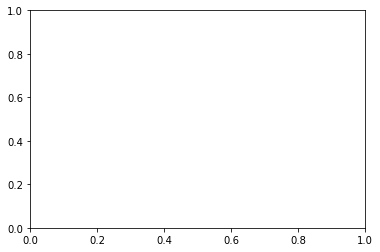

In [78]:
sns.lineplot(data=dfmn,x='events',y='dNch_deta_[0 5]',yerr=dfsd['dNch_deta_[0 5]'].values)

In [77]:
dfmn.head()

,dNch_deta_[0 5],dNch_deta_[ 5 10],dNch_deta_[10 20],dNch_deta_[20 30],dNch_deta_[30 40],dNch_deta_[40 50],dNch_deta_[50 60],dNch_deta_[60 70],dET_deta_[0. 2.5],dET_deta_[2.5 5. ],...,v32_[20 30],v32_[30 40],v32_[40 50],v42_[0 5],v42_[ 5 10],v42_[10 20],v42_[20 30],v42_[30 40],v42_[40 50],events
0,1337.166621,1049.813450,902.517547,630.230052,449.259320,266.944303,137.317422,89.840965,1922.438154,1627.796249,...,0.025194,0.025909,0.032841,0.002460,0.009086,0.011822,0.012333,0.015256,0.012568,100
1,1308.509084,1049.050069,799.582127,589.158918,426.163552,263.961692,155.442556,93.041023,1830.180418,1587.648118,...,0.026378,0.030177,0.025326,0.009042,0.008647,0.009384,0.014214,0.011384,0.014807,200
2,1351.882961,1075.685645,835.813772,623.653187,471.964535,307.439844,172.160049,95.837165,1854.177846,1689.383387,...,0.025219,0.023450,0.026793,0.009158,0.010285,0.011010,0.012523,0.013659,0.012391,300
3,1378.925442,1099.322429,875.841991,656.775631,485.732529,310.965566,170.627899,90.332312,1876.385575,1719.533100,...,0.023512,0.023569,0.025046,0.010158,0.009504,0.012509,0.011243,0.013025,0.012155,400
4,1380.664044,1118.340312,877.200061,671.156580,486.401558,313.456712,172.884685,88.675820,1865.880148,1745.393689,...,0.024467,0.023744,0.025801,0.009735,0.009156,0.012460,0.012261,0.012853,0.011286,500


In [10]:
experiment=pd.read_csv(filepath_or_buffer="PbPb2760_experiment",index_col=0)
experiment.head()

,dNch_deta[0 5],dNch_deta[ 5 10],dNch_deta[10 20],dNch_deta[20 30],dNch_deta[30 40],dNch_deta[40 50],dNch_deta[50 60],dNch_deta[60 70],dET_deta[0. 2.5],dET_deta[2.5 5. ],...,v32[10 20],v32[20 30],v32[30 40],v32[40 50],v42[0 5],v42[ 5 10],v42[10 20],v42[20 30],v42[30 40],v42[40 50]
mean,1601.0,1294.0,966.0,649.0,426.0,261.0,149.0,76.0,1803.0,1647.0,...,0.026220,0.028840,0.030310,0.030220,9.720000e-03,1.133000e-02,1.250000e-02,1.390000e-02,1.540000e-02,0.015140
variance,3600.0,2401.0,1369.0,529.0,225.0,81.0,36.0,16.0,11981.0,9882.0,...,0.000001,0.000001,0.000002,0.000002,2.362000e-07,4.234000e-07,3.229000e-07,5.345000e-07,7.093000e-07,0.000001


In [11]:
exp_label=[]
for i in experiment.columns:
    words=i.split('[')
    exp_label.append(words[0]+'_['+words[1])

In [12]:
dfsd=dfsd[exp_label]

In [13]:
ratio = []
for i, row in enumerate(dfsd.values):
    sd_exp =np.sqrt(experiment.values[1,:])
    ratio.append(np.divide(row,sd_exp))
ratio_df = pd.DataFrame(ratio, columns=dfsd.keys())

In [25]:
for i,row in enumerate(ratio_df.values):
    print('Numer of events per design')
    print((i+1)*100)
    print('Number of observables with $\sigma_{simu}/\sigma_{exp} > 1$')
    print(len(row[np.argwhere(row>1)]))
    print('Mean of the $\sigma_{simu}/\sigma_{exp} > 1$')
    print(np.mean(row[np.argwhere(row>1)]))
    print('Maximum value of the $\sigma_{simu}/\sigma_{exp} $')
    print(np.max(row[np.argwhere(row>1)]))
    print('Observable names with $\sigma_{simu}/\sigma_{exp} > 1$')
    print(dfsd.keys()[np.argwhere(row>1)])
    

Numer of events per design
100
Number of observables with $\sigma_{simu}/\sigma_{exp} > 1$
42
Mean of the $\sigma_{simu}/\sigma_{exp} > 1$
3.8474704863389877
Maximum value of the $\sigma_{simu}/\sigma_{exp} $
8.034368212606118
Observable names with $\sigma_{simu}/\sigma_{exp} > 1$
[['dNch_deta_[30 40]']
 ['dNch_deta_[40 50]']
 ['dNch_deta_[60 70]']
 ['dET_deta_[40. 45.]']
 ['dET_deta_[45. 50.]']
 ['dET_deta_[65. 70.]']
 ['dN_dy_pion_[40 50]']
 ['dN_dy_pion_[60 70]']
 ['dN_dy_kaon_[40 50]']
 ['dN_dy_kaon_[60 70]']
 ['pT_fluct_[0 5]']
 ['pT_fluct_[ 5 10]']
 ['pT_fluct_[10 15]']
 ['pT_fluct_[15 20]']
 ['pT_fluct_[20 25]']
 ['pT_fluct_[25 30]']
 ['pT_fluct_[30 35]']
 ['pT_fluct_[35 40]']
 ['pT_fluct_[40 45]']
 ['pT_fluct_[45 50]']
 ['pT_fluct_[50 55]']
 ['pT_fluct_[55 60]']
 ['v22_[0 5]']
 ['v22_[ 5 10]']
 ['v22_[10 20]']
 ['v22_[20 30]']
 ['v22_[30 40]']
 ['v22_[40 50]']
 ['v22_[50 60]']
 ['v22_[60 70]']
 ['v32_[0 5]']
 ['v32_[ 5 10]']
 ['v32_[10 20]']
 ['v32_[20 30]']
 ['v32_[30 40]']
 [

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [15]:
ratio_df.head()

,dNch_deta_[0 5],dNch_deta_[ 5 10],dNch_deta_[10 20],dNch_deta_[20 30],dNch_deta_[30 40],dNch_deta_[40 50],dNch_deta_[50 60],dNch_deta_[60 70],dET_deta_[0. 2.5],dET_deta_[2.5 5. ],...,v32_[10 20],v32_[20 30],v32_[30 40],v32_[40 50],v42_[0 5],v42_[ 5 10],v42_[10 20],v42_[20 30],v42_[30 40],v42_[40 50]
0,0.969700,0.250885,0.889979,0.689831,1.337261,2.396354,0.739045,1.220623,0.054625,0.760089,...,5.857545,4.738202,2.562405,5.879075,8.034368,2.832358,4.591538,3.312672,3.610592,1.996974
1,0.542168,0.277078,0.581067,0.560717,0.746386,1.139670,0.934001,0.810094,0.345266,0.237267,...,2.494036,2.450462,3.335741,2.266628,6.840490,2.463308,3.185676,2.618092,1.945111,1.841518
2,0.345532,0.308434,0.500205,0.335227,0.607067,1.084221,0.927931,0.774286,0.205754,0.274354,...,2.492388,2.361975,1.498061,2.783275,4.634561,2.496487,2.323414,1.976581,1.778610,1.471017
3,0.301482,0.302293,0.387133,0.344569,0.587204,0.930236,0.871566,0.632776,0.255534,0.209889,...,2.164194,1.986906,1.283698,2.316847,3.367630,2.345612,2.277505,1.766309,1.436616,1.266838
4,0.233080,0.309288,0.334780,0.346423,0.533852,0.825092,0.747404,0.624548,0.220928,0.168777,...,1.932093,1.744814,1.109973,1.980264,2.914810,2.066639,2.149368,1.562153,1.222934,1.136501


In [ ]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,10))
#ax.set_xtick(rotation=45, ha='right')
plt.ylabel('$\sigma_{sim}$/$\sigma_{exp}$')
plt.xlabel('Number of Events')

def more_events(i):
    row_df = ratio_df.iloc[i]
    row_sorted = row_df.sort_values(ascending=False)
    #print((i+1)*100)
    #print(row_sorted.head(20))
    x_values = np.arange(100,(i+1)*100,100)
    y_values = row_sorted.values[0:20]
    legend_labels = row_sorted.keys()[0:20]
    x = x_values
    y = []
    ratio_sub_df = ratio_df[legend_labels]
    for ii in range(0,i):
        #x_values = np.arange(100,(ii+2)*100,100)
        row_sub_df = ratio_sub_df.iloc[ii]
        row_sub_sorted = row_sub_df.sort_values(ascending=False)
        y_values = row_sub_sorted.values[0:20]
        y.append(y_values)
        #x.append(x_values)
    #print(x)
    #print(y)
    for y_row in np.array(y).T:
        #print(y_row)
        plt.plot(x,y_row.flatten())
        plt.legend(legend_labels,loc="upper right",  ncol=4)
        plt.tight_layout()
        plt.axhline(1,c='black')
    #print(len(row[np.argwhere(row>1)]))
    #print(np.mean(row[np.argwhere(row>1)]))
    #print(np.max(row[np.argwhere(row>1)]))
    #print(dfsd.keys()[np.argwhere(row>1)])



import matplotlib.animation as anim
animator = anim.FuncAnimation(fig, more_events, interval = 10, frames=np.arange(0,48))
plt.show()

f = "animation.mp4" 
#writergif = matplotlib.animation.PillowWriter(fps=2) 
#animator.save(f, writer=writergif)

writervideo = matplotlib.animation.FFMpegWriter(fps=3, bitrate=1000) 
animator.save(f, writer=writervideo)
#anim.save('test.mp4')

<IPython.core.display.Javascript object>


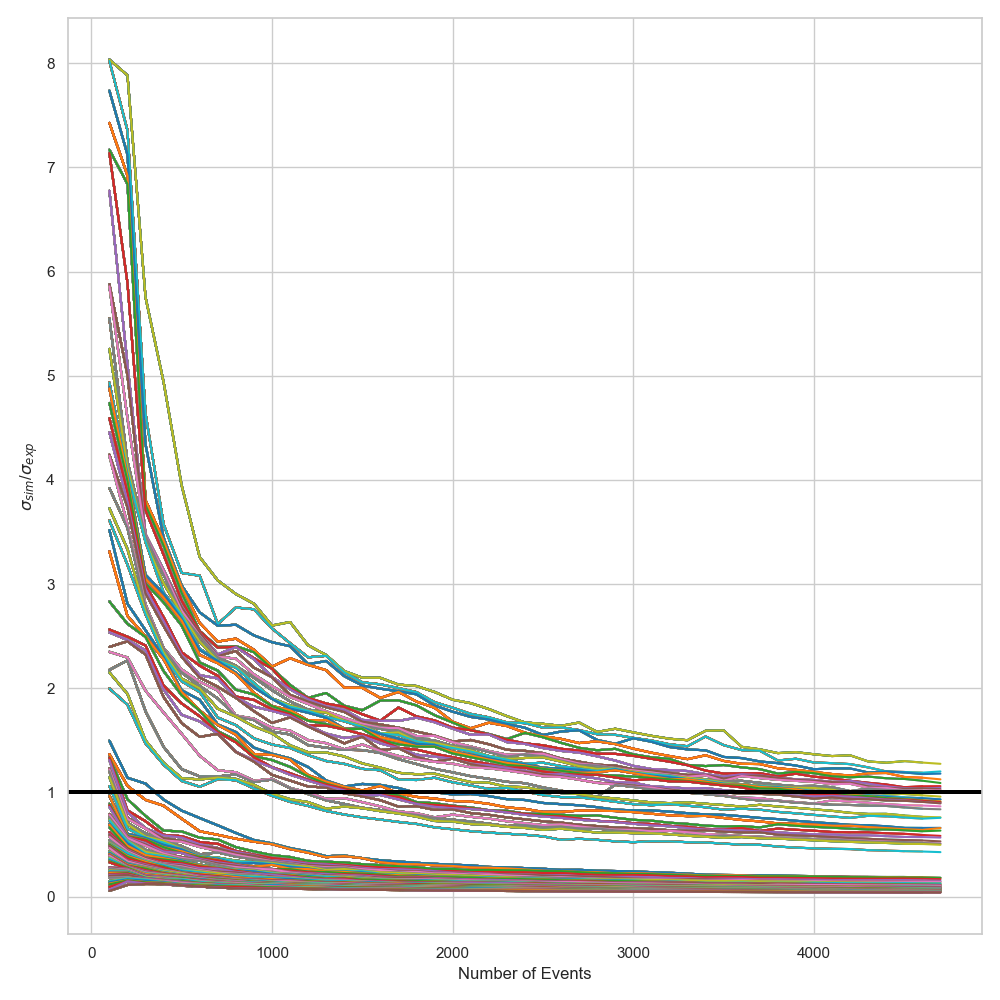

In [16]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,10))
#ax.set_xtick(rotation=45, ha='right')
plt.ylabel('$\sigma_{sim}$/$\sigma_{exp}$')
plt.xlabel('Number of Events')

def more_events(i):
    row_df = ratio_df.iloc[i]
    row_sorted = row_df.sort_values(ascending=False)
    #print((i+1)*100)
    #print(row_sorted.head(20))
    x_values = np.arange(100,(i+1)*100,100)
    y_values = row_sorted.values[0:-1]
    legend_labels = row_sorted.keys()[0:-1]
    x = x_values
    y = []
    ratio_sub_df = ratio_df[legend_labels]
    for ii in range(0,i):
        #x_values = np.arange(100,(ii+2)*100,100)
        row_sub_df = ratio_sub_df.iloc[ii]
        row_sub_sorted = row_sub_df.sort_values(ascending=False)
        y_values = row_sub_sorted.values[0:-1]
        y.append(y_values)
        #x.append(x_values)
    #print(x)
    #print(y)
    for y_row in np.array(y).T:
        #print(y_row)
        plt.plot(x,y_row.flatten())
        #plt.legend(legend_labels,loc="upper right",  ncol=4)
        plt.tight_layout()
        plt.axhline(1,c='black')
    #print(len(row[np.argwhere(row>1)]))
    #print(np.mean(row[np.argwhere(row>1)]))
    #print(np.max(row[np.argwhere(row>1)]))
    #print(dfsd.keys()[np.argwhere(row>1)])



import matplotlib.animation as anim
animator = anim.FuncAnimation(fig, more_events, interval = 10, frames=np.arange(0,48))
plt.show()

f = "animation_all.gif" 
writergif = matplotlib.animation.PillowWriter(fps=2) 
animator.save(f, writer=writergif)

#writervideo = matplotlib.animation.FFMpegWriter(fps=3) 
#animator.save(f, writer=writervideo)
#anim.save('test.mp4')